# **Machine Learning Programming**
## Week07_Decision Tree Assignment

* Please use the **adult** dataset that we've been using.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Assignment #1**

Please train a **Decision Tree Classifier** to predict whether a person earns more than $50,000 per year (`'income'`) based on their attributes (`'age'`,
`'education.num'`, `'hours.per.week'`). (10 pts)

- Split the dataset into **training** and **testing** sets **(70/30)**
- Train a Decision Tree Classifier (6 pts)
- Visualize the decision tree using plot_tree (2 pts)
- Evaluate your model using **accuracy score** (2 pts)

- The assignment should be completed based on what we covered in Week 7.
-  **Please note that the code must be submitted in a state where it runs correctly when executed by the TA.**

In [26]:
import pandas as pd

# Please download timesData. If necessary, you may change variable names.
adult = pd.read_csv('/adult.csv')

Missing values per column:
 age               0
education.num     0
hours.per.week    0
dtype: int64 

Accuracy: 0.7707032449585424
Confusion Matrix:
 [[6718  711]
 [1529  811]]

Decision Tree Splitting Rules (max_depth=3):
|--- education.num <= 12.50
|   |--- age <= 32.50
|   |   |--- age <= 25.50
|   |   |   |--- age <= 23.50
|   |   |   |   |--- truncated branch of depth 11
|   |   |   |--- age >  23.50
|   |   |   |   |--- truncated branch of depth 13
|   |   |--- age >  25.50
|   |   |   |--- hours.per.week <= 49.50
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- hours.per.week >  49.50
|   |   |   |   |--- truncated branch of depth 13
|   |--- age >  32.50
|   |   |--- hours.per.week <= 41.50
|   |   |   |--- education.num <= 8.50
|   |   |   |   |--- truncated branch of depth 20
|   |   |   |--- education.num >  8.50
|   |   |   |   |--- truncated branch of depth 19
|   |   |--- hours.per.week >  41.50
|   |   |   |--- education.num <= 7.50
|   |   |   |   |--

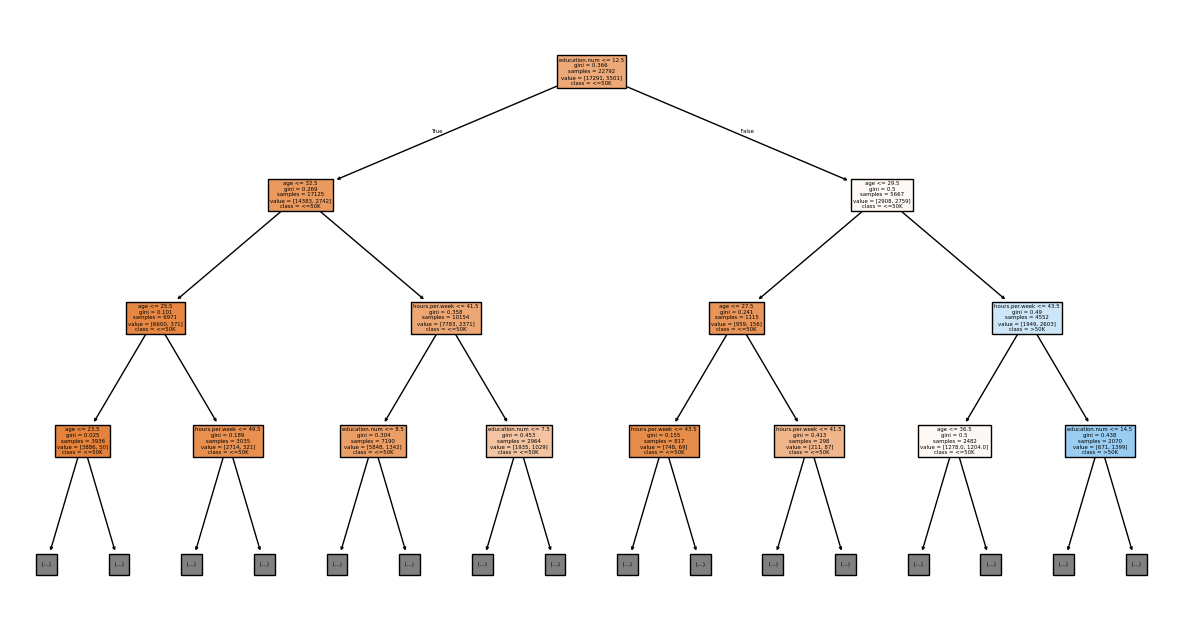

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 2) Feature / Target 정의
features = ['age', 'education.num', 'hours.per.week']
X = adult[features]
y = adult['income']  # '<=50K' or '>50K'


print("Missing values per column:\n", X.isnull().sum(), "\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nDecision Tree Splitting Rules (max_depth=3):")
print(export_text(dt, feature_names=features, max_depth=3))

plt.figure(figsize=(15, 8))
plot_tree(
    dt,
    feature_names=features,
    class_names=dt.classes_,
    filled=True,
    max_depth=3
)
plt.show()


In this assignment, the goal was to use the adult.csv dataset to predict whether an individual's income exceeds $50,000 based on three features: age, education.num, and hours.per.week.

The dataset was split into 70% training data and 30% test data.

Initially, the decision tree was trained without specifying a maximum depth, but for better interpretability and visualization, the tree depth was later limited to max_depth=3.

The model achieved an accuracy of approximately 0.771.

The confusion matrix was as follows: [6718 711; 1529 811]

 - TN (True Negative) = 6718 → Actually ≤50K and predicted ≤50K

 - FP (False Positive) = 711 → Actually ≤50K but predicted >50K

 - FN (False Negative) = 1529 → Actually >50K but predicted ≤50K

 - TP (True Positive) = 811 → Actually >50K and predicted >50K

The decision tree’s splitting rules were first printed in text format,
followed by a visual tree plot for better understanding of the branching structure.




